     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7  \
0  0.374540  0.950714  0.731994  0.598658  0.156019  0.155995  0.058084   
1  0.969585  0.775133  0.939499  0.894827  0.597900  0.921874  0.088493   
2  0.031429  0.636410  0.314356  0.508571  0.907566  0.249292  0.410383   
3  0.908266  0.239562  0.144895  0.489453  0.985650  0.242055  0.672136   
4  0.642032  0.084140  0.161629  0.898554  0.606429  0.009197  0.101472   

     Gene_8    Gene_9   Gene_10  ...   Gene_42   Gene_43   Gene_44   Gene_45  \
0  0.866176  0.601115  0.708073  ...  0.495177  0.034389  0.909320  0.258780   
1  0.195983  0.045227  0.325330  ...  0.713245  0.760785  0.561277  0.770967   
2  0.755551  0.228798  0.076980  ...  0.251782  0.497249  0.300878  0.284840   
3  0.761620  0.237638  0.728216  ...  0.897216  0.900418  0.633101  0.339030   
4  0.663502  0.005062  0.160808  ...  0.953929  0.914864  0.370159  0.015457   

    Gene_46   Gene_47   Gene_48   Gene_49   Gene_50  Label  
0  0.66

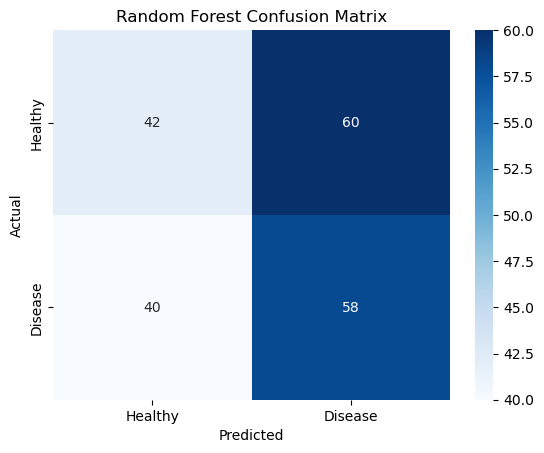

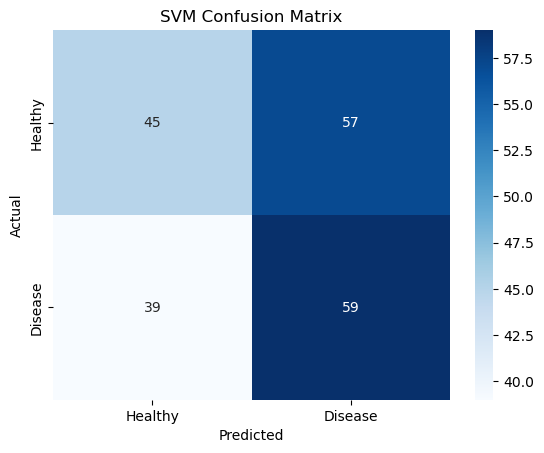

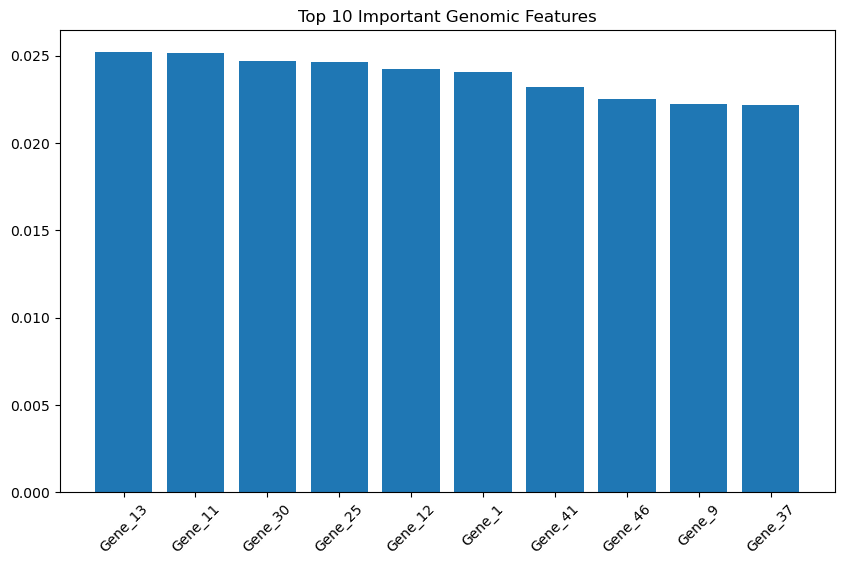

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Simulate Dataset
np.random.seed(42)
X = np.random.rand(1000, 50)
y = np.random.randint(0, 2, 1000)
df = pd.DataFrame(X, columns=[f"Gene_{i}" for i in range(1,51)])
df["Label"] = y
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(df.drop("Label", axis=1), df["Label"], test_size=0.2, random_state=42)

# 2. Train Models
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm = SVC(kernel="linear").fit(X_train, y_train)

rf_pred, svm_pred = rf.predict(X_test), svm.predict(X_test)

# 3. Evaluation Function
def evaluate(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate("Random Forest", y_test, rf_pred)
evaluate("SVM", y_test, svm_pred)

# 4. Confusion Matrix
def plot_cm(y_true, y_pred, title):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=["Healthy","Disease"], yticklabels=["Healthy","Disease"])
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

plot_cm(y_test, rf_pred, "Random Forest Confusion Matrix")
plot_cm(y_test, svm_pred, "SVM Confusion Matrix")

# 5. Feature Importance (RF)
imp = rf.feature_importances_
idx = np.argsort(imp)[-10:][::-1]
plt.figure(figsize=(10,6))
plt.bar(range(10), imp[idx], tick_label=[f"Gene_{i+1}" for i in idx])
plt.title("Top 10 Important Genomic Features"); plt.xticks(rotation=45); plt.show()
